In [198]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt 

In [199]:
data=pd.read_excel('cogort.xlsx')

In [200]:
data.head()

,date,user_id,price,segment
0,2024-05-01,ЗАО МИЭЛЬ,2,АН
1,2024-05-01,Индивидуальный предприниматель Беспалова Екате...,1,АН
2,2024-05-01,Индивидуальный предприниматель Бузницкий Викто...,1,АН
3,2024-05-01,Индивидуальный предприниматель Буренкова Вален...,1,АН
4,2024-05-01,Индивидуальный предприниматель Давыдова Мария ...,1,АН


In [201]:
# проверим и выведем типы данных в каждом столбце
data.dtypes

date       datetime64[ns]
user_id            object
price               int64
segment            object
dtype: object

In [202]:
# посчитаем и выведем количество пропущенных значений в каждом столбце
pd.isnull(data).sum()

date        0
user_id    12
price       0
segment    44
dtype: int64

In [203]:
#дропаем пустые значения
data = data.dropna()

In [204]:
data.shape

(8763, 4)

In [205]:
# функция возвращает год и месяц, 1 вместо дня
def get_month(x):
    return dt.datetime(x.year,x.month, 1)

In [206]:
data['month_year']=data['date'].apply(get_month)

In [211]:
data.head()

,date,user_id,price,segment,month_year,cohortMonth
0,2024-05-01,ЗАО МИЭЛЬ,2,АН,2024-05-01,2023-06-01
1,2024-05-01,Индивидуальный предприниматель Беспалова Екате...,1,АН,2024-05-01,2024-05-01
2,2024-05-01,Индивидуальный предприниматель Бузницкий Викто...,1,АН,2024-05-01,2023-11-01
3,2024-05-01,Индивидуальный предприниматель Буренкова Вален...,1,АН,2024-05-01,2024-05-01
4,2024-05-01,Индивидуальный предприниматель Давыдова Мария ...,1,АН,2024-05-01,2024-05-01


In [212]:
data['cohortMonth']=data.groupby('user_id')['month_year'].transform('min')

In [213]:
data.head()

,date,user_id,price,segment,month_year,cohortMonth
0,2024-05-01,ЗАО МИЭЛЬ,2,АН,2024-05-01,2023-06-01
1,2024-05-01,Индивидуальный предприниматель Беспалова Екате...,1,АН,2024-05-01,2024-05-01
2,2024-05-01,Индивидуальный предприниматель Бузницкий Викто...,1,АН,2024-05-01,2023-11-01
3,2024-05-01,Индивидуальный предприниматель Буренкова Вален...,1,АН,2024-05-01,2024-05-01
4,2024-05-01,Индивидуальный предприниматель Давыдова Мария ...,1,АН,2024-05-01,2024-05-01


In [214]:
def get_date(df,column):
    year=df[column].dt.year
    month=df[column].dt.month
    day=df[column].dt.day
    return year,month,day

In [215]:
date_year,date_month,_=get_date(data,'date')

In [216]:
cohort_year,cohort_month,_=get_date(data,'cohortMonth')

In [217]:
year_diff=date_year-cohort_year

In [218]:
month_diff=date_month-cohort_month

In [219]:
data['cohort_index']=year_diff*12+month_diff+1

In [220]:
data.head()
data = data.query('segment == "АН"')
data

,date,user_id,price,segment,month_year,cohortMonth,cohort_index
0,2024-05-01,ЗАО МИЭЛЬ,2,АН,2024-05-01,2023-06-01,12
1,2024-05-01,Индивидуальный предприниматель Беспалова Екате...,1,АН,2024-05-01,2024-05-01,1
2,2024-05-01,Индивидуальный предприниматель Бузницкий Викто...,1,АН,2024-05-01,2023-11-01,7
3,2024-05-01,Индивидуальный предприниматель Буренкова Вален...,1,АН,2024-05-01,2024-05-01,1
4,2024-05-01,Индивидуальный предприниматель Давыдова Мария ...,1,АН,2024-05-01,2024-05-01,1
...,...,...,...,...,...,...,...
8511,2023-06-01,"ООО ""Южное Агентство Недвижимости""",1,АН,2023-06-01,2023-06-01,1
8512,2023-06-01,"ООО ""Юралс Груп""",1,АН,2023-06-01,2023-06-01,1
8513,2023-06-01,ООО Юридическое Строительное Объединение Недви...,1,АН,2023-06-01,2023-06-01,1
8514,2023-06-01,ООО ЮРИСТ,1,АН,2023-06-01,2023-06-01,1


In [221]:
data['cohort_index'].unique()

array([12,  1,  7,  6, 10,  2, 11,  9,  3,  8,  5,  4])

In [222]:
data1=data.pivot_table(index='cohortMonth',
                      columns='cohort_index',
                      values='user_id',
                      aggfunc=len)

In [223]:
data1 = data1.iloc[:, ::-1]  # Reverse the order of the columns

In [224]:
data1

cohort_index,12,11,10,9,8,7,6,5,4,3,2,1
cohortMonth,,,,,,,,,,,,
2023-06-01,17.0,49.0,45.0,59.0,40.0,63.0,47.0,50.0,46.0,49.0,49.0,254.0
2023-07-01,NaN,14.0,29.0,27.0,33.0,24.0,43.0,26.0,23.0,24.0,33.0,217.0
2023-08-01,NaN,NaN,16.0,37.0,46.0,44.0,23.0,45.0,25.0,25.0,29.0,244.0
2023-09-01,NaN,NaN,NaN,8.0,13.0,17.0,16.0,18.0,29.0,15.0,19.0,186.0
2023-10-01,NaN,NaN,NaN,NaN,3.0,19.0,18.0,19.0,13.0,26.0,22.0,170.0
2023-11-01,NaN,NaN,NaN,NaN,NaN,5.0,13.0,19.0,11.0,12.0,16.0,144.0
2023-12-01,NaN,NaN,NaN,NaN,NaN,NaN,13.0,30.0,36.0,54.0,30.0,307.0
2024-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,9.0,12.0,6.0,115.0
2024-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,25.0,30.0,200.0


In [225]:
first_column=data1.iloc[:,11]
first_column

cohortMonth
2023-06-01    254.0
2023-07-01    217.0
2023-08-01    244.0
2023-09-01    186.0
2023-10-01    170.0
2023-11-01    144.0
2023-12-01    307.0
2024-01-01    115.0
2024-02-01    200.0
2024-03-01    205.0
2024-04-01    195.0
2024-05-01     55.0
Name: 1, dtype: float64

In [226]:
retention=data1.div(first_column,axis=0)

In [227]:
retention.round(2)

cohort_index,12,11,10,9,8,7,6,5,4,3,2,1
cohortMonth,,,,,,,,,,,,
2023-06-01,0.07,0.19,0.18,0.23,0.16,0.25,0.19,0.20,0.18,0.19,0.19,1.0
2023-07-01,NaN,0.06,0.13,0.12,0.15,0.11,0.20,0.12,0.11,0.11,0.15,1.0
2023-08-01,NaN,NaN,0.07,0.15,0.19,0.18,0.09,0.18,0.10,0.10,0.12,1.0
2023-09-01,NaN,NaN,NaN,0.04,0.07,0.09,0.09,0.10,0.16,0.08,0.10,1.0
2023-10-01,NaN,NaN,NaN,NaN,0.02,0.11,0.11,0.11,0.08,0.15,0.13,1.0
2023-11-01,NaN,NaN,NaN,NaN,NaN,0.03,0.09,0.13,0.08,0.08,0.11,1.0
2023-12-01,NaN,NaN,NaN,NaN,NaN,NaN,0.04,0.10,0.12,0.18,0.10,1.0
2024-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.04,0.08,0.10,0.05,1.0
2024-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.03,0.12,0.15,1.0


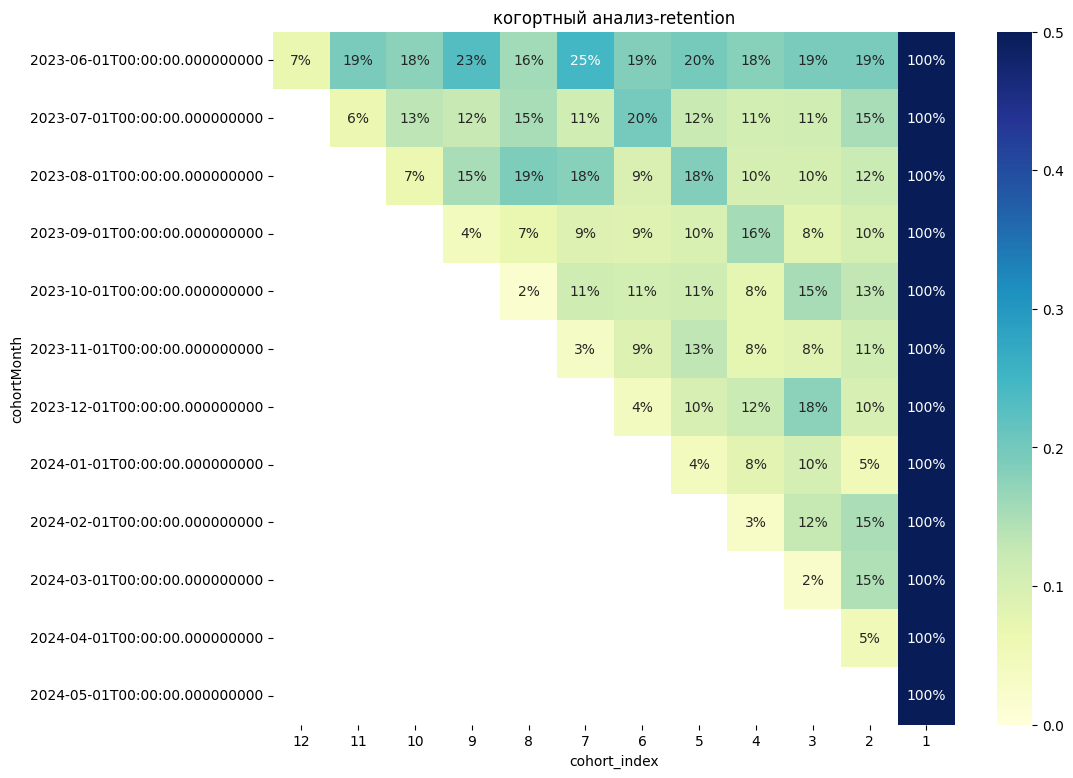

In [228]:
plt.figure(figsize=(11,9))
plt.title('когортный анализ-retention')
sns.heatmap(data=retention,
           annot=True,
           fmt='.0%',
           vmin=0.0,
           vmax=0.5,
           cmap="YlGnBu")
plt.show()

In [62]:
data2=data.pivot_table(index='cohortMonth',
                      columns='cohort_index',
                      values='user_id',
                      aggfunc=lambda x: len(x.unique()))

In [63]:
data2

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12
cohortMonth,,,,,,,,,,,,
2023-06-01,544.0,67.0,68.0,58.0,64.0,60.0,77.0,53.0,76.0,56.0,62.0,24.0
2023-07-01,506.0,59.0,35.0,31.0,34.0,55.0,35.0,48.0,40.0,33.0,15.0,NaN
2023-08-01,570.0,50.0,34.0,41.0,54.0,33.0,56.0,61.0,46.0,22.0,NaN,NaN
2023-09-01,489.0,30.0,25.0,36.0,26.0,24.0,32.0,24.0,8.0,NaN,NaN,NaN
2023-10-01,448.0,38.0,37.0,23.0,31.0,23.0,28.0,4.0,NaN,NaN,NaN,NaN
2023-11-01,488.0,40.0,23.0,27.0,39.0,24.0,7.0,NaN,NaN,NaN,NaN,NaN
2023-12-01,768.0,46.0,72.0,53.0,46.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-01,372.0,20.0,25.0,21.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-02-01,628.0,61.0,50.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
first_column=data2.iloc[:,0]

In [65]:
retention=data2.div(first_column,axis=0)

In [66]:
retention.round(2)

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12
cohortMonth,,,,,,,,,,,,
2023-06-01,1.0,0.12,0.12,0.11,0.12,0.11,0.14,0.10,0.14,0.10,0.11,0.04
2023-07-01,1.0,0.12,0.07,0.06,0.07,0.11,0.07,0.09,0.08,0.07,0.03,NaN
2023-08-01,1.0,0.09,0.06,0.07,0.09,0.06,0.10,0.11,0.08,0.04,NaN,NaN
2023-09-01,1.0,0.06,0.05,0.07,0.05,0.05,0.07,0.05,0.02,NaN,NaN,NaN
2023-10-01,1.0,0.08,0.08,0.05,0.07,0.05,0.06,0.01,NaN,NaN,NaN,NaN
2023-11-01,1.0,0.08,0.05,0.06,0.08,0.05,0.01,NaN,NaN,NaN,NaN,NaN
2023-12-01,1.0,0.06,0.09,0.07,0.06,0.02,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-01,1.0,0.05,0.07,0.06,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-02-01,1.0,0.10,0.08,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


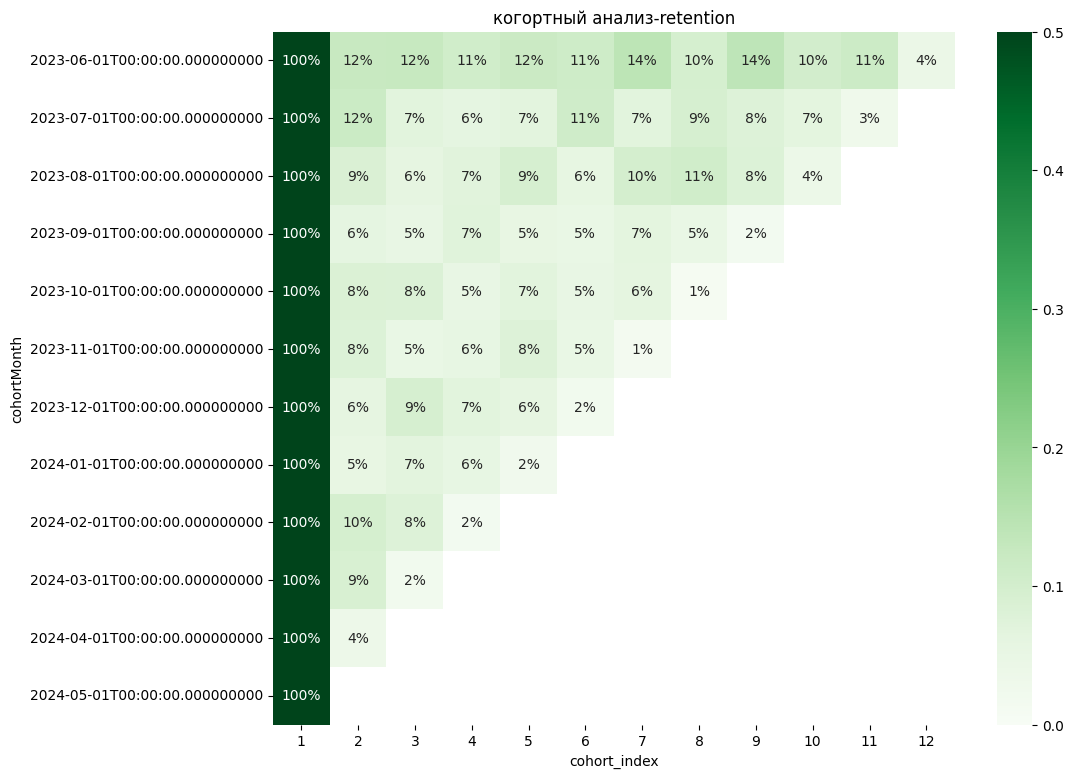

In [67]:
plt.figure(figsize=(11,9))
plt.title('когортный анализ-retention')
sns.heatmap(data=retention,
           annot=True,
           fmt='.0%',
           vmin=0.0,
           vmax=0.5,
           cmap="Greens")
plt.show()

In [71]:
data3=data.pivot_table(index='cohortMonth',
                      columns='cohort_index',
                      values='price',
                      aggfunc=sum)

In [72]:
data3

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12
cohortMonth,,,,,,,,,,,,
2023-06-01,759.0,192.0,198.0,146.0,151.0,164.0,220.0,98.0,180.0,164.0,160.0,41.0
2023-07-01,616.0,77.0,40.0,46.0,44.0,84.0,45.0,72.0,60.0,51.0,23.0,NaN
2023-08-01,700.0,66.0,44.0,46.0,81.0,38.0,74.0,80.0,59.0,23.0,NaN,NaN
2023-09-01,522.0,31.0,33.0,45.0,32.0,29.0,43.0,31.0,8.0,NaN,NaN,NaN
2023-10-01,481.0,40.0,53.0,23.0,37.0,25.0,34.0,4.0,NaN,NaN,NaN,NaN
2023-11-01,526.0,60.0,36.0,35.0,51.0,30.0,7.0,NaN,NaN,NaN,NaN,NaN
2023-12-01,870.0,57.0,89.0,67.0,65.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-01,391.0,25.0,25.0,25.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-02-01,689.0,72.0,67.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
first_column=data3.iloc[:,0]

In [74]:
retention=data3.div(first_column,axis=0)

In [75]:
retention.round(2)

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12
cohortMonth,,,,,,,,,,,,
2023-06-01,1.0,0.25,0.26,0.19,0.20,0.22,0.29,0.13,0.24,0.22,0.21,0.05
2023-07-01,1.0,0.12,0.06,0.07,0.07,0.14,0.07,0.12,0.10,0.08,0.04,NaN
2023-08-01,1.0,0.09,0.06,0.07,0.12,0.05,0.11,0.11,0.08,0.03,NaN,NaN
2023-09-01,1.0,0.06,0.06,0.09,0.06,0.06,0.08,0.06,0.02,NaN,NaN,NaN
2023-10-01,1.0,0.08,0.11,0.05,0.08,0.05,0.07,0.01,NaN,NaN,NaN,NaN
2023-11-01,1.0,0.11,0.07,0.07,0.10,0.06,0.01,NaN,NaN,NaN,NaN,NaN
2023-12-01,1.0,0.07,0.10,0.08,0.07,0.02,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-01,1.0,0.06,0.06,0.06,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-02-01,1.0,0.10,0.10,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


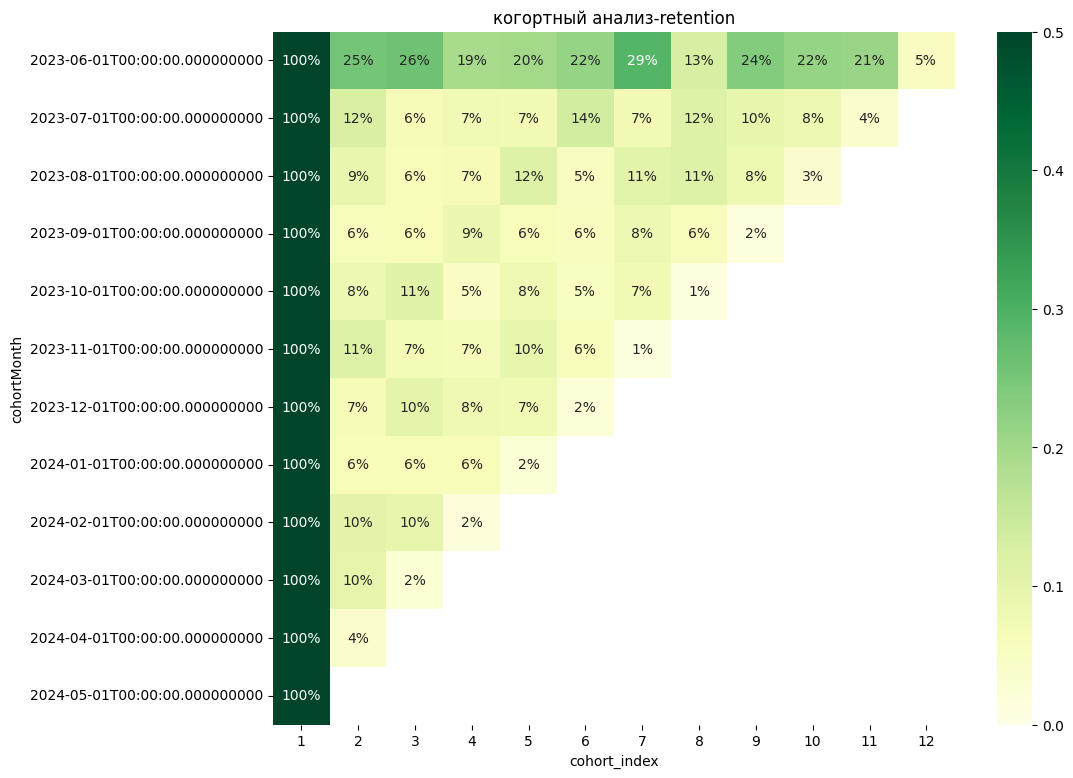

In [76]:
plt.figure(figsize=(11,9))
plt.title('когортный анализ-retention')
sns.heatmap(data=retention,
           annot=True,
           fmt='.0%',
           vmin=0.0,
           vmax=0.5,
           cmap="YlGn")
plt.show()

Выводы:
Количество покупателей каждый месяц сокращается. Это естественно. Но особенно аномально это произошло во второй когорте начиная с седьмого месяца. График сумм покупок также показывает эту когорту, которая выделяется из общей картины.
Лучшая возвращаемость клиентов наблюдается у когорт 1,3,5,6, 8 А худшая - у когорт: 2,4,7

